In [2]:
#warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from scipy import interpolate
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline as BSp

Let us first define some function $f(x) = \cos(-x^2/9)$, and obtain the interpolating
polynomials for the same

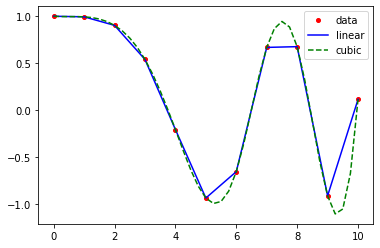

In [4]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f1 = interp1d(x, y)
f3 = interp1d(x, y, kind='cubic')

# defining the new set of points where f needs to be evaluated
xnew = np.linspace(0, 10, num=41, endpoint=True)
plt.plot(x, y, 'or', markersize=4)
plt.plot(xnew, f1(xnew), '-b', xnew, f3(xnew), '--g')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

Performing the same interpolation using Bsplines

[ 1.          0.98353054  1.05684811  0.61929198 -0.18281315 -1.12107971
 -0.94014483  0.95979731  1.16187424 -2.60111886  0.11527995  0.
  0.          0.          0.        ]
[ 1.          0.98353054  1.05684811  0.61929198 -0.18281315 -1.12107971
 -0.94014483  0.95979731  1.16187424 -2.60111886  0.11527995  0.
  0.          0.          0.        ]


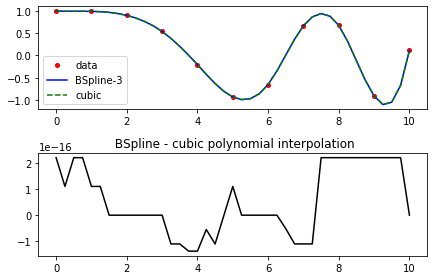

In [5]:
t, c, k = interpolate.splrep(x, y, s=0, k=3)
# t = knot locations
# c = spline coefficients
# k = degree
spline = BSp(t, c, k, extrapolate=True)
print(c)

# modifying some coefficients to see how the curves change
# c[-5:] +=2
print(c)
fig, axs = plt.subplots(2)
axs[0].plot(x, y, 'or', markersize=4)
axs[0].plot(xnew, spline(xnew), '-b', xnew, f3(xnew), '--g')
axs[0].legend(['data', 'BSpline-3', 'cubic'], loc='best')

axs[1].plot(xnew, spline(xnew)-f3(xnew), 'k')
axs[1].set_title(' BSpline - cubic polynomial interpolation')
fig.tight_layout()

In [41]:
w = np.loadtxt("/scratch/g.samarth/get-solar-eigs/efs_Antia/snrnmais_files/data_files/w_s/w.dat")
r = np.loadtxt("/scratch/g.samarth/get-solar-eigs/efs_Antia/snrnmais_files/data_files/r.dat")
mask1 = (r<1)#*(r>0.9)
r = r[mask1]
knot_num = 56
lenr = len(r)
r_spacing = int(lenr//knot_num)
r_filtered = r[::r_spacing]
knot_locs = r_filtered[1:-1]
#knot_locs = r_filtered[r_filtered < 1]
#knot_locs = np.linspace(0, 1, 61)
w1 = w[0, mask1]
w3 = w[1, mask1]
w5 = w[2, mask1]

t1, c1, k1 = interpolate.splrep(r, w1, s=0, k=3, t=knot_locs)
t3, c3, k3 = interpolate.splrep(r, w3, s=0, k=3, t=knot_locs)
t5, c5, k5 = interpolate.splrep(r, w5, s=0, k=3, t=knot_locs)

rnew = r #np.linspace(0, 1.0, 60, endpoint=True)
spline = BSp(t1, c1, k1, extrapolate=True)
w1new = spline(rnew)

spline = BSp(t3, c3, k3, extrapolate=True)
w3new = spline(rnew)

spline = BSp(t5, c5, k5, extrapolate=True)
w5new = spline(rnew)


In [42]:
print(f"knot-locations = {knot_locs}")
print(f"Number of knots beyond 0.95 = {len(knot_locs[knot_locs>0.95])}")

knot-locations = [0.00995986 0.01797899 0.02599812 0.03401725 0.04208978 0.0513644
 0.0625007  0.07574739 0.09131379 0.10940698 0.13066597 0.15550496
 0.18401574 0.2159598  0.25078386 0.28780523 0.32634169 0.36578241
 0.40557682 0.44527194 0.48452777 0.52309662 0.56080276 0.59752256
 0.63317603 0.66702169 0.68485063 0.69743633 0.7084831  0.71899897
 0.72962081 0.74115658 0.75576156 0.78126699 0.80679655 0.83039624
 0.85214341 0.87210542 0.89034218 0.90690899 0.92185587 0.93522716
 0.94706356 0.9574042  0.96628648 0.97376049 0.97993088 0.98495156
 0.98887128 0.99180621 0.99402791 0.9957428  0.99709266 0.9981721
 0.99908668]
Number of knots beyond 0.95 = 12


In [ ]:
rmin, rmax = 0, 1.2
rminidx = np.argmin(abs(r-rmin))
rmaxidx = np.argmin(abs(r-rmax))

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 7))
axs.flatten()[0].plot(r[rminidx:rmaxidx], w1[rminidx:rmaxidx], 'b')
axs.flatten()[0].plot(rnew[rminidx:rmaxidx], w1new[rminidx:rmaxidx], '--r')
axs.flatten()[1].plot(rnew[rminidx:rmaxidx], (w1new[rminidx:rmaxidx] - w1[rminidx:rmaxidx])/w1[rminidx:rmaxidx]*100, '--k')
axs.flatten()[2].ticklabel_format(axis="y", style="plain")

axs.flatten()[2].plot(r[rminidx:rmaxidx], w3[rminidx:rmaxidx], 'b')
axs.flatten()[2].plot(rnew[rminidx:rmaxidx], w3new[rminidx:rmaxidx], '--r')
axs.flatten()[3].plot(rnew[rminidx:rmaxidx], (w3new[rminidx:rmaxidx] - w3[rminidx:rmaxidx])/w3[rminidx:rmaxidx]*100, '--k')
axs.flatten()[3].ticklabel_format(axis="y", style="plain")

axs.flatten()[4].plot(r[rminidx:rmaxidx], w5[rminidx:rmaxidx], 'b')
axs.flatten()[4].plot(rnew[rminidx:rmaxidx], w5new[rminidx:rmaxidx], '--r')
axs.flatten()[5].plot(rnew[rminidx:rmaxidx], (w5new[rminidx:rmaxidx] - w5[rminidx:rmaxidx])/w5[rminidx:rmaxidx]*100, '--k')
axs.flatten()[5].ticklabel_format(axis="y", style="plain")
fig.tight_layout()

/home/g.samarth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/home/g.samarth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/g.samarth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


In [15]:
r[7057]

0.999999344